In [2]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('/Users/hengzizhao/Documents/Excercise/Telco_customer_churn.csv')
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
data.columns = data.columns.str.replace(" ", "",regex=True)

In [6]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'ZipCode', 'LatLong',
       'Latitude', 'Longitude', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'TenureMonths', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'ChurnLabel', 'ChurnValue', 'ChurnScore', 'CLTV', 'ChurnReason'],
      dtype='object')

In [13]:
data.drop(['CustomerID','Count','Country','State','City','ZipCode','LatLong','Latitude','Longitude','ChurnLabel'
          ,'ChurnScore','CLTV','ChurnReason'],axis=1,inplace=True)

In [35]:
df = data.copy(deep=True)

In [36]:
ndf = df[(df['InternetService']!='No') & (df['Contract']=='Month-to-month')]

In [37]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            3351 non-null   object 
 1   SeniorCitizen     3351 non-null   object 
 2   Partner           3351 non-null   object 
 3   Dependents        3351 non-null   object 
 4   TenureMonths      3351 non-null   int64  
 5   PhoneService      3351 non-null   object 
 6   MultipleLines     3351 non-null   object 
 7   InternetService   3351 non-null   object 
 8   OnlineSecurity    3351 non-null   object 
 9   OnlineBackup      3351 non-null   object 
 10  DeviceProtection  3351 non-null   object 
 11  TechSupport       3351 non-null   object 
 12  StreamingTV       3351 non-null   object 
 13  StreamingMovies   3351 non-null   object 
 14  Contract          3351 non-null   object 
 15  PaperlessBilling  3351 non-null   object 
 16  PaymentMethod     3351 non-null   object 


In [45]:
ndf.loc[ndf['TotalCharges'] == ' ', 'TotalCharges']=0
ndf['TotalCharges']= pd.to_numeric(ndf['TotalCharges'])

<ipython-input-45-c86a53d0eb11>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['TotalCharges']= pd.to_numeric(ndf['TotalCharges'])


In [46]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            3351 non-null   object 
 1   SeniorCitizen     3351 non-null   object 
 2   Partner           3351 non-null   object 
 3   Dependents        3351 non-null   object 
 4   TenureMonths      3351 non-null   int64  
 5   PhoneService      3351 non-null   object 
 6   MultipleLines     3351 non-null   object 
 7   InternetService   3351 non-null   object 
 8   OnlineSecurity    3351 non-null   object 
 9   OnlineBackup      3351 non-null   object 
 10  DeviceProtection  3351 non-null   object 
 11  TechSupport       3351 non-null   object 
 12  StreamingTV       3351 non-null   object 
 13  StreamingMovies   3351 non-null   object 
 14  Contract          3351 non-null   object 
 15  PaperlessBilling  3351 non-null   object 
 16  PaymentMethod     3351 non-null   object 


### Kaplan-Meier

1.Fit Kaplan-Meier survival probability curves to IBM's Telco dataset.

2.Visually assess survival probability curves at the population-level and the covariate level.

3.Use the log-rank test to determine if survival curves are statistically equivalent.

4.Extract survival probabilities for subsequent modeling.

### Overview

Kaplan-Meier is a statistical method that is used to construct survival probablity curves. This method takes censoring into account, therefore overcoming the issue of underestimating survival probabilities that ocurrs when using mean or median.

The log-rank test is a chi-square test that is used to test the null hypothesis that two or more survival curves are statistically equivalant.



In [49]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines.statistics import pairwise_logrank_test

### Fit the Kaplan-Meier Model

The first step when using Lifelines for Kaplan-Meier is to fit the model. This step requires two parameters: tenure and churn.

Tenure: the duration that a customer has been with the company (if still a subscriber) or was with the company prior to churning.

Churn: a Boolean indicating whether the customer is still a subscriber or not.

In [51]:
ndf['ChurnValue'].value_counts()

0    1795
1    1556
Name: ChurnValue, dtype: int64

In [50]:
kmf = KaplanMeierFitter()
 
T=ndf['TenureMonths']
C=ndf['ChurnValue']
 
kmf.fit(T,C)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3351 total observations, 1795 right-censored observations>

### Visually Assess the Population-Level Survival Curve

The Plot: As seen in the plot below, the survival probability curve is plotted with time on the x-axis and survival probability on the y-axis.

Interpretation: In the purest sense, the probability of a customer surviving at least 0 months is 100%. This is represented by the point (0,1.0) in the plot below. Moving down the survival curve to the median (34 months), it can be said that a customer has a 50% probability of surviving at least 34 months, given that they have survived 33 months. Please note that the last clause 'given that...' signifies that this is a conditional probability.

Confidence Intervals: The light blue border surrounding the survival probability curve represents the confidence interval. Thie wider the interval, the lower the confidence. As seen in the plot below, confidence in the estimates decrease as the timeline increases. While this reduced confidence is likely due to having less data, it is also intuitive that we would have more confidence in our predictions for the near-term than in our predictions for the longer-term.

<AxesSubplot:title={'center':'Kaplan-Meier Survival Curve: Population level'}, xlabel='timeline'>

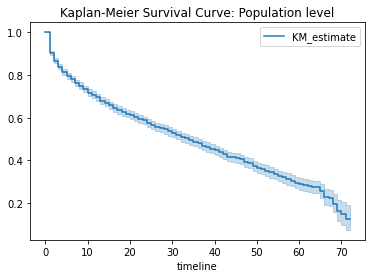

In [52]:
kmf.plot(title='Kaplan-Meier Survival Curve: Population level')

In [53]:
kmf.median_survival_time_

34.0

### Assess Survival Probabilities at the Covariate-Level

When viewing Kaplan-Meier curves at the covariate-level, it's ideal to see some level of divergence between the groups as this indicates a difference that can be used for predictions. Online Security is a good example of this.

For the purposes of prediction, it's less ideal to see the survival curves very close together, as is the case for the variable Gender. When survival curves are very close together, you may want to check whether they are statistically equivalent. This is the purpose of the log-rank test. The null hypothesis for the log-rank states that the groups are statistically equivalent.

As seen below, the p-value in our log-rank test for Gender is greater than 0.05 and therefore, we cannot reject the null hypothesis that the two groups are statistically equivalent.

Although it's not useful for prediction to find out that the two groups are statistically equivalent, there are benefits from an inference standpoint. For example, suppose you have a new promotion that provides subscribers with free access to a streaming service. If you find out that those with the service are the same as those without the service, you may ask whether the return on providing free access is high enough to cover costs. In contrast, suppose you want to understand the effect of throttling. If you find that the effect is minimal, you may have cause to continue doing so.

In [83]:
# Helper function for plotting Kaplan-Meier curves at the covariate level
def plot_km(col):
    plt.figure()
    for r in ndf[col].unique():
        ix = ndf[col] == r
        kmf.fit(T[ix], C[ix],label=r)
        kmf.plot()
    plt.title("Assess Survival Probabilities at the Covariate-Level of {}".format(col))
# Helper function for printing out Log-rank test results
def print_logrank(col):
    log_rank = pairwise_logrank_test(ndf['TenureMonths'], ndf[col], ndf['ChurnValue'])
    return log_rank.summary

In [102]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0000,0,0,0,478,478
1.0000,18,10,8,0,478
2.0000,21,12,9,0,460
3.0000,19,12,7,0,439
4.0000,11,6,5,0,420
...,...,...,...,...,...
68.0000,1,0,1,0,7
69.0000,2,1,1,0,6
70.0000,1,0,1,0,4


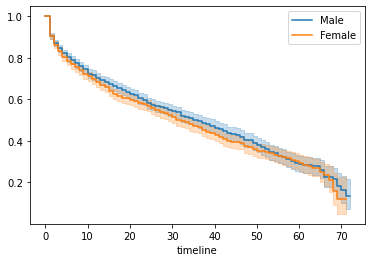

In [81]:
plot_km('Gender')

In [100]:
print_logrank('PaymentMethod')


test_statistic      p  \
Bank transfer (automatic) Credit card (automatic)          0.0615 0.8041   
                          Electronic check                91.1919 0.0000   
                          Mailed check                    43.5370 0.0000   
Credit card (automatic)   Electronic check                79.9911 0.0000   
                          Mailed check                    39.6846 0.0000   
Electronic check          Mailed check                     0.8983 0.3432   

                                                   -log2(p)  
Bank transfer (automatic) Credit card (automatic)    0.3146  
                          Electronic check          69.3776  
                          Mailed check              34.4846  
Credit card (automatic)   Electronic check          61.2055  
                          Mailed check              31.6417  
Electronic check          Mailed check               1.5427

In [104]:
# ndf.columns.tolist()
cate_feature = [
 'Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
#  'TenureMonths',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
#  'Contract',
 'PaperlessBilling',
 'PaymentMethod',
#  'MonthlyCharges',
#  'TotalCharges',
#  'ChurnValue'
]

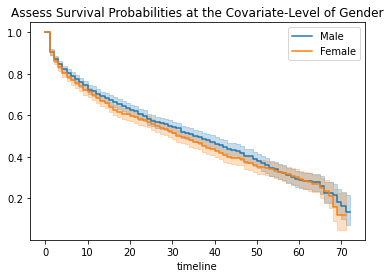

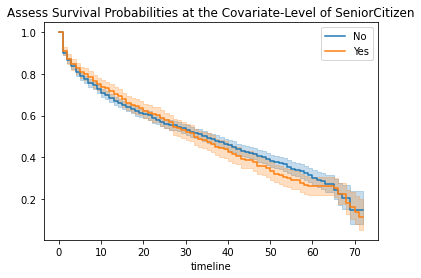

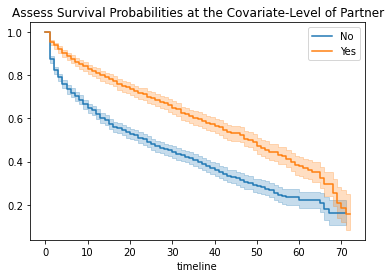

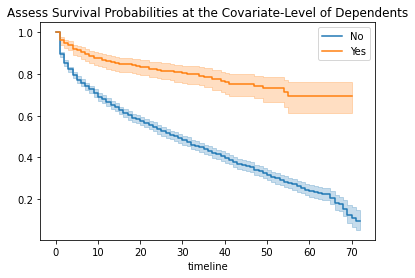

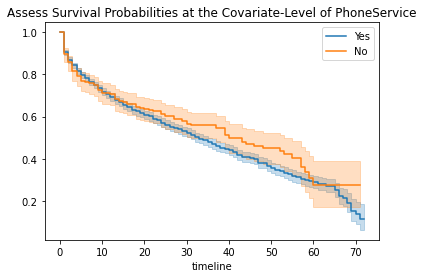

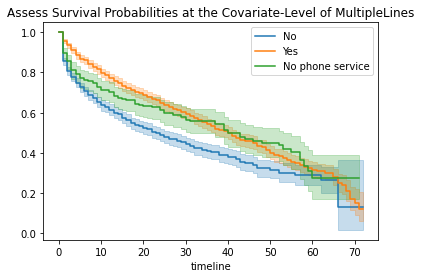

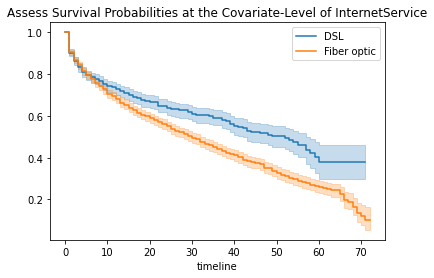

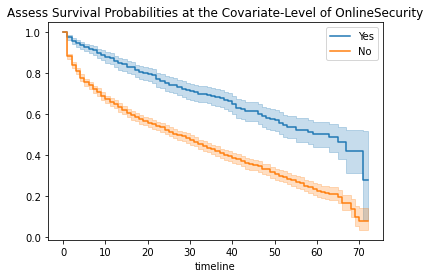

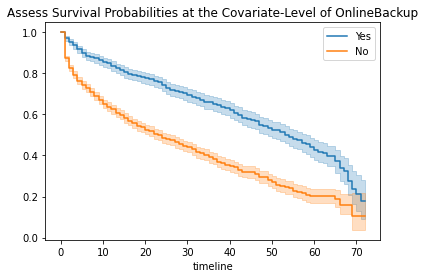

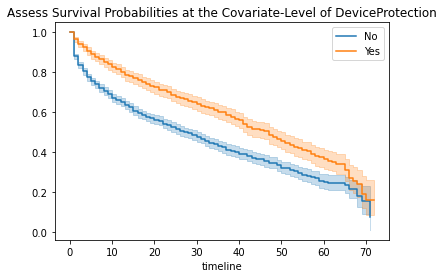

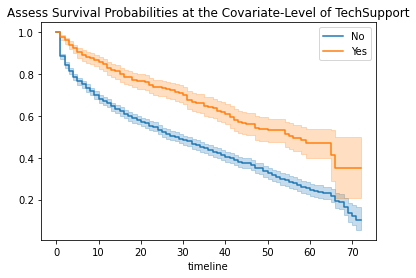

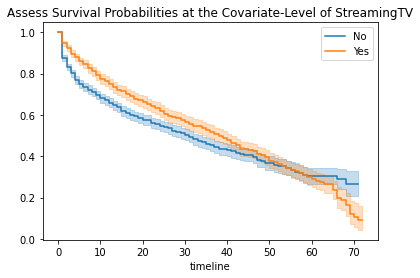

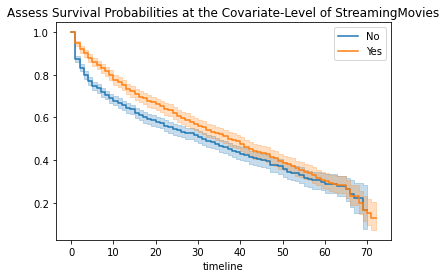

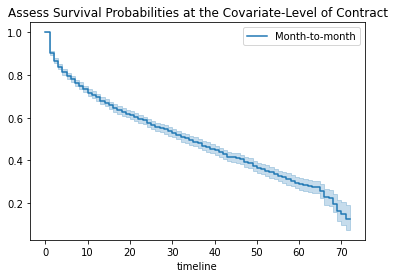

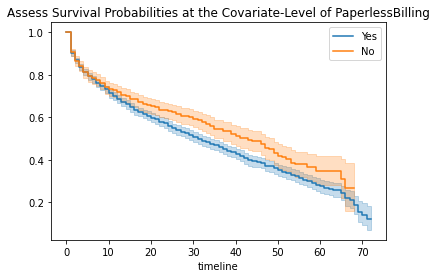

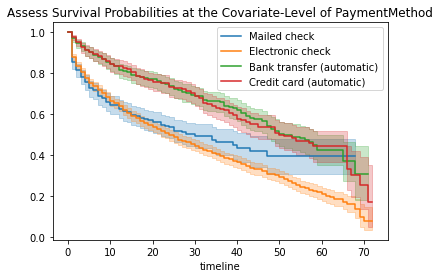

In [97]:
df_log = dict()
for col in cate_feature:
    
    plot_km(col)
    df_log.update({col:print_logrank(col)})


In [95]:
 pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [98]:
df_log

{'Gender':              test_statistic      p  -log2(p)
 Female Male          2.0389 0.1533    2.7054,
 'SeniorCitizen':         test_statistic      p  -log2(p)
 No Yes          0.1255 0.7232    0.4676,
 'Partner':         test_statistic      p  -log2(p)
 No Yes        135.7589 0.0000  101.8080,
 'Dependents':         test_statistic      p  -log2(p)
 No Yes        140.0461 0.0000  104.9227,
 'PhoneService':         test_statistic      p  -log2(p)
 No Yes          1.6837 0.1944    2.3627,
 'MultipleLines':                                    test_statistic      p  -log2(p)
 No               No phone service         12.3827 0.0004   11.1723
                  Yes                      72.3584 0.0000   55.6291
 No phone service Yes                       1.5003 0.2206    2.1803,
 'InternetService':                  test_statistic      p  -log2(p)
 DSL Fiber optic         25.1729 0.0000   20.8635,
 'OnlineSecurity':         test_statistic      p  -log2(p)
 No Yes        141.6032 0.0000  106.05

### Extract Survival Probabilities

After you complete your analysis, you may want to extract the survival probabilities to use for another application. Lifelines makes this quite easy to do.

Please note that later on, we will extract the output from a Cox Proportional Hazard model and use it as an input for a Customer Lifetime Value dashboard.

In [ ]:
def get_survival_probs(col,val):
      ix = ndf[col] == val
    return kmf.fit(T[ix],C[ix],label=val)  

# Extract survival probabilities for customers with internetService = DSL
sp_internet_dsl = get_survival_probs('internetService','DSL')
pd.DataFrame(sp_internet_dsl.survival_function_at_times(range(0,10)))

### Closing Thoughts

Kaplan-Meier is extremely useful for univariate analysis as it helps establish more intuition for the data at hand. Cox Proportional Hazards, which we cover in the next notebook, is more useful for multi-variate analysis.

In the plots above, you may notice that the survival curves for a given covariate crossover each other. This is a red flag that we will discuss in the next notebook.

As you'll soon see, Kaplan-Meier curves have some interesting applications that make them useful even when leveraging different techniques.

### Cox Proportional Hazards

In this lesson you:

1. Fit a Cox Proportional Hazard model to IBM's Telco dataset.

2. Interpret the statistical output of the Cox Proportional Hazard Model.

3. Determine whether the model adheres to or violates the proportional hazard assumption.


### Overview

In contrast to Kaplan-Meier, Cox Proportional Hazards can be used for multi-variate analysis.

Similar to Kaplan-Meier, Cox Proportional Hazards can be used to plot survival probability curves but the way it is done differs mathematically. The result is referred to as adjusted survival probability curves because you adjust for other covariates.

### The Cox Proportional Hazards Equation

Whereas Kaplan-Meier is used to estimate the probability of survival, Cox Proportional Hazards is used to estimate the hazard ratio. The hazard ratio represents the difference in hazard that exists between two individiuals (or groups). The hazard is essentially the inverse of survival, or the probability of failure. The fact that Kaplan-Meier estimates the probability of survival whereas Cox Proportional Hazards estimates a hazard ratio is not a concern because as long as you have one, you can calculate the other. The Lifelines library makes this easy to do.

The Cox Proportional Hazards equation states that the hazard ratio is the product of two terms: the baseline hazard and the partial hazard.

The Baseline Hazard is simply a baseline. It's the hazard that exists when each variable is set to a specific value. For example:


<img style="float: none!important;" src="02jpg.jpg" alt="image-2" width="20%"/>




The Partial Hazard represents the change in the hazard that occurs when the value for a variable is different from the baseline. At any given time, zero or more variables can contain a value different from the baseline. As seen in the equation below, the resulting change in the hazard is a linear combination of the parameters / variables.

If every variable were set to its corresponding baseline value, then the partial hazard would equal 1 (since e^0 = 1) and the hazard ratio would equal the baseline hazard.


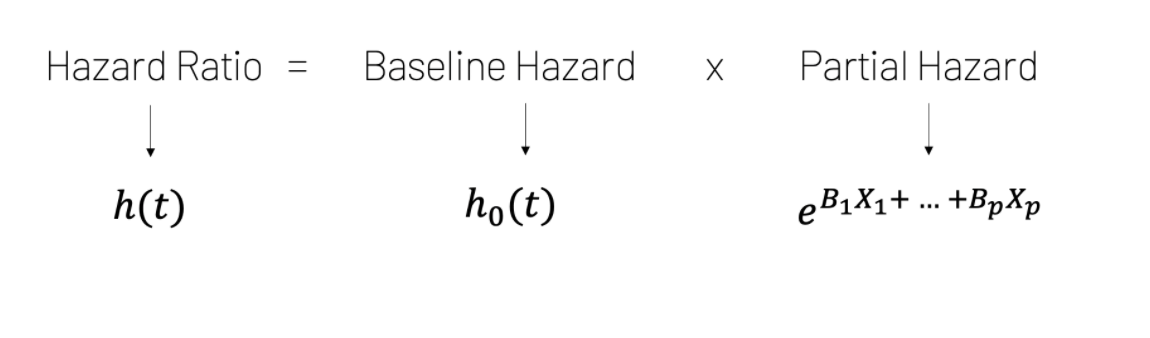



### The Proportional Hazards Assumption
A subtle but critical element of the Cox Proportional Hazard equation is that the baseline hazard is a function of time t, but not the parameters, whereas the partial hazard is a function of the parameters, but not time. This underpins what is referred to as the proportional hazard assumption.

The proportional hazard assumption states that in the context of a Cox Proportional Hazard model, the hazard ratio between two groups is proportional over time. This assumption is implicit in the equation above because the lack of t in the partial hazard means that the partial hazard changes the hazard ratio by some factor, independent of time.


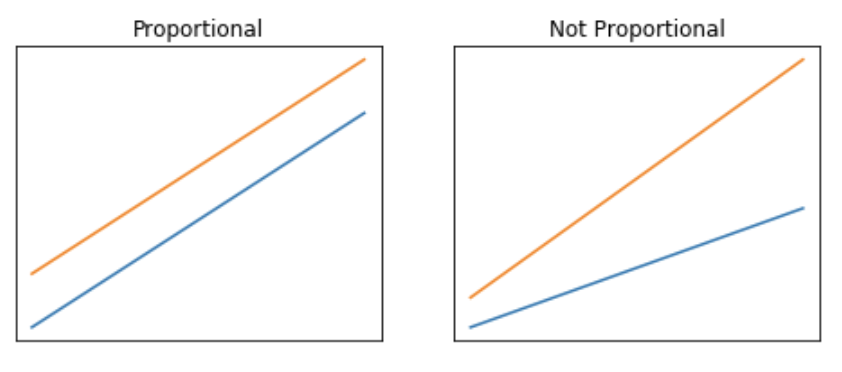

In [103]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
 
from lifelines.fitters.coxph_fitter import CoxPHFitter
from lifelines.statistics import proportional_hazard_test
from lifelines import KaplanMeierFitter

### One-Hot Encode the Categorical Variables

In order to fit a Cox Proportional Hazards model using the Lifelines library, you must first one-hot encode your categorical columns. We have hand-selected 5 variables to use for this notebook.

After one-hot encoding the variables, we then created a new dataframe consisting of only the columns we need to fit the model.

When creating the dataframe that you will use to fit the model, it is important that you drop one column for each one-hot encoded variable. For example, we included dependents_yes and dropped dependents_no. If you neglect to do this, you will likely receive an error when fitting the model that states that there are multi-collinearity issues with your data. This means that certain columns are highly correlated. For example, if you know that dependents_yes = 1 then you in turn know that dependents_no = 0.

You can take one of two approaches when dropping variables. When using Pandas' get_dummies() function, you can simply set drop_first = True. An alternative approach, which is the one taken here, is to hand-select which variables to drop. In this notebook, we dropped the value that had a Kaplan-Meier survival probability curve most similar to the population. While this is by no means necessary, it affords an intuitive interpretation as the baseline closely resembles the population.

In [105]:
# Encode columns of interest
# encode_cols = ['dependents','internetService','onlineBackup','techSupport','paperlessBilling']
ndf.drop(['Contract'],axis=1,inplace=True)

encoded_pd = pd.get_dummies(ndf,
               columns=cate_feature,
               prefix=cate_feature,
               drop_first=False)
 
encoded_pd.head()

/Users/hengzizhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,TenureMonths,MonthlyCharges,TotalCharges,ChurnValue,Gender_Female,Gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2,53.8500,108.1500,1,0,1,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
1,2,70.7000,151.6500,1,1,0,1,0,1,0,...,1,0,1,0,0,1,0,0,1,0
2,8,99.6500,820.5000,1,1,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
3,28,104.8000,3046.0500,1,1,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,0
4,49,103.7000,5036.3000,1,0,1,1,0,1,0,...,0,1,0,1,0,1,1,0,0,0


In [106]:
encoded_pd.columns

Index(['TenureMonths', 'MonthlyCharges', 'TotalCharges', 'ChurnValue',
       'Gender_Female', 'Gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [122]:
kept_col = ['TenureMonths', 'MonthlyCharges','ChurnValue',
       'Gender_Male', 'SeniorCitizen_Yes',
       'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 
       'MultipleLines_Yes',
       'InternetService_DSL', 
        'OnlineSecurity_Yes', 
       'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 
       'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_No',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
        'PaymentMethod_Mailed check']
     
# survial_pd = encoded_pd[[kept_col]]

In [123]:
survival_pd = encoded_pd[kept_col]

### Fit the Cox Proportional Hazards Model

Similar to Kaplan-Meier, the first step when using the Lifelines library for Cox Proportional Hazards is to fit the model.

When fitting the model, we specified alpha = 0.05. This means that we will use a 95% confidence interval for our statistical tests.

We provided three parameters to the fitted model:

suvival_pd: the dataframe used to fit the model

Tenure: the duration that a customer has been with the company (if still a subscriber) or was with the company prior to churning.

Churn: a Boolean indicating whether the customer is still a subscriber or not.

In [124]:
cph = CoxPHFitter(alpha=0.05)
cph.fit(survival_pd, 'TenureMonths', 'ChurnValue')

<lifelines.CoxPHFitter: fitted with 3351 total observations, 1795 right-censored observations>

### Assess the Results of the Fitted Model

There are three key questions to ask when initially assessing the model:

Is each covariate statistically significant?

In the column labeled p below, it can be seen that the p-value for each column is below < 0.005. Therefore, each of the columns is statistically significant and safe to include.

Similar to other forms of regression, in the event that a variable is not statisitically significant, you can drop that column from your analysis or recategorize the corresponding values.
How confident are we in the coefficient estimates?

Upper and lower bounds for each coefficient and exp(coefficient) are provided in the model summary below (e.g. exp(coef) lower 95%, exp(coef) upper 95%).

Shown below the model summary, these bounds can also be viewed visually. Although it's not seen here, note that when viewing the bounds in this way, a variable can be deemed as not signficant when its corresponding box-and-whisker plot crosses the value 1.

What is the effect of each covariate on the hazard ratio?

Using internetService_DSL as an example, it's shown below that coef = -0.22 and exp(coef) = 0.80. Referring back to the Cox Proportional Hazards equation, this means that a customer's hazard ratio decreases by a factor of 0.80 (versus the baseline) when they subscribe to DSL for their internet service.

Note that this output also includes several metrics that can be used when comparing models:

Concordance

Partial AIC

Log-likelihood Ratio

In [125]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 3351 total observations, 1795 right-censored observations>
             duration col = 'TenureMonths'
                event col = 'ChurnValue'
      baseline estimation = breslow
   number of observations = 3351
number of events observed = 1556
   partial log-likelihood = -11039.65
         time fit was run = 2021-05-12 16:28:31 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                       
MonthlyCharges                            0.01       1.01       0.03            -0.04             0.06                 0.96                 1.06
Gender_Male                              -0.11       0.89       0.05            -0.21            -0.01                 0.81                 0.99
SeniorCitizen_Yes                        -0.10       0.90       0.06            -0.22             0.01                 0.80                 1.01
Partner_Yes                              -0.39       0.68       0.06            -0.50            -0.27                 0.61                 0.76
Dependents_Yes                           -0.86       0.42       0.11            -1.08            -0.64                 0.34                 0.53
PhoneService_Yes                         -0.10       0.91       0.52            -1.13             0.93                 0.32                 2.54
MultipleLines_Yes                        -0.48       0.62       0.14            -0.75            -0.21                 0.47                 0.81
InternetService_DSL                      -0.15       0.86       0.64            -1.40             1.10                 0.25                 3.01
OnlineSecurity_Yes                       -0.71       0.49       0.15            -1.00            -0.42                 0.37                 0.66
OnlineBackup_Yes                         -0.69       0.50       0.14            -0.97            -0.41                 0.38                 0.66
DeviceProtection_Yes                     -0.38       0.69       0.14            -0.65            -0.10                 0.52                 0.90
TechSupport_Yes                          -0.57       0.56       0.15            -0.87            -0.28                 0.42                 0.75
StreamingTV_Yes                          -0.15       0.86       0.26            -0.67             0.36                 0.51                 1.44
StreamingMovies_Yes                      -0.30       0.74       0.26            -0.81             0.22                 0.44                 1.24
PaperlessBilling_No                      -0.17       0.84       0.06            -0.30            -0.05                 0.74                 0.95
PaymentMethod_Bank transfer (automatic)  -0.62       0.54       0.08            -0.78            -0.46                 0.46                 0.63
PaymentMethod_Credit card (automatic)    -0.67       0.51       0.08            -0.83            -0.51                 0.43                 0.60
PaymentMethod_Mailed check               -0.06       0.95       0.08            -0.21             0.10                 0.81                 1.11

                                            z      p   -log2(p)
covariate                                                      
MonthlyCharges                           0.29   0.77       0.37
Gender_Male                             -2.22   0.03       5.25
SeniorCitizen_Yes                       -1.74   0.08       3.61
Partner_Yes                             -6.75 <0.005      35.93
Dependents_Yes                          -7.64 <0.005      45.42
PhoneService_Yes                        -0.19   0.85       0.23
MultipleLines_Yes                       -3.44 <0.005      10.74
InternetService_DSL                     -0.24   0.81       0.30
OnlineSecurity_Yes                      -4.81 <0.005      19.37
OnlineBackup_Yes   

<AxesSubplot:xlabel='HR (95% CI)'>

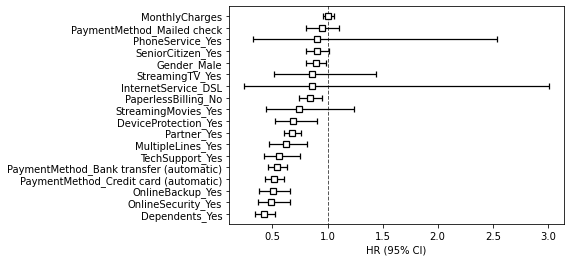

In [126]:
cph.plot(hazard_ratios=True)

### Verify if the Model Adheres to the Proportional Hazard Assumption

After assessing the results of the fitted model, the next step is to verify whether the model adheres to the proportional hazard assumption. We will do this using three methods:

Method 1: Statistical Test

Method 2: Schoenfield Residuals

Method 3: Log-log Kaplan-Meier Plots

The results of using the first method -- a statistical test -- are shown below. As seen in the printout, Lifelines provides quite a bit of detail, including test results and recommendations. In the case of this model, it is seen that we violate the proportional hazard assumption for three of the four variables. This is illustrated by the p-values being less than 0.05 as well as the text below it. Of note, as hinted in the closing thoughts section of the Kaplan-Meier notebook, a red flag for this scenario is when you see the survival curves for a given covariate crossover each other when using Kaplan-Meier.

In [127]:
cph.check_assumptions(survival_pd,p_value_threshold=0.05)

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3351 total observations, 1795 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Dependents_Yes                          km              6.54   0.01      6.57
                                        rank            5.28   0.02      5.54
DeviceProtection_Yes                    km              1.47   0.23      2.15
                                        rank            3.50   0.06      4.03
Gender_Male                             km              0.04   0.84      0.26
                                        rank            0.00   0.96      0.06
InternetService_DSL                     km              0.36   0.55      0.87
                                        rank            1.53   0.22      2.21
MonthlyCharges                          km              0.18   0.67      0.58
                                        rank            1.06   0.30      1.73
MultipleLines_Yes                       km              4.26   0.04      4.68
                                        rank            7.13   0.01      7.04
OnlineBackup_Yes                        km              2.50   0.11      3.14
                                        rank            4.27   0.04      4.69
OnlineSecurity_Yes                      km              3.48   0.06      4.01
                                        rank            7.29   0.01      7.17
PaperlessBilling_No                     km              0.05   0.82      0.29
                                        rank            0.38   0.54      0.90
Partner_Yes                             km              9.44 <0.005      8.88
                                        rank            8.78 <0.005      8.36
PaymentMethod_Bank transfer (automatic) km              4.49   0.03      4.87
                                        rank            5.69   0.02      5.87
PaymentMethod_Credit card (automatic)   km              7.79   0.01      7.57
                                        rank            8.74 <0.005      8.33
PaymentMethod_Mailed check              km              2.48   0.12      3.11
                                        rank            2.72   0.10      3.33
PhoneService_Yes                        km              0.23   0.63      0.67
                                        rank            1.14   0.29      1.81
SeniorCitizen_Yes                       km              0.05   0.82      0.29
                                        rank            0.07   0.80      0.33
StreamingMovies_Yes                     km              0.55   0.46      1.12
                                        rank            2.04   0.15      2.71
StreamingTV_Yes                         km              1.56   0.21      2.24
                                        rank            3.19   0.07      3.76
TechSupport_Yes                         km              1.67   0.20      2.35
                                        rank            4.92   0.03      5.23



1. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0021.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

2. Variable 'Dependents_Yes' failed the non-proportional test: p-value is 0.0105.

   Advice: with so few unique values (only 2), you can include `strata=['Dependents_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.0076.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

4. Variable 'OnlineSecurity_Yes' failed the non-proportional test: p-value is 0.0069.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineSecurity_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

5. Variable 'OnlineBackup_Yes'

[]

### Schoenfeld Residuals

In addition to running a statistical test, it is helpful to also leverage a graphical output to assess the situation. This can be done using Schoenfeld residuals.

In the output below, there are two plots for each variable. The difference between these two plots is the order in which the residual values are displayed: Rank tranformed time and KM-transformed time. No material difference is seen between these two types of plots for our model.

The way to interpret these plots is similar to the way you would interpret residual plots for linear regression. In other words, when viewing this type of plot, we do not want to see any sort of pattern in the residuals. When no pattern is present, the black line in the middle will be relatively flat, indicating that the residuals are not correlated with time.

internetService_DSL: clear and consistent trend across time.

onlineBackup_Yes: most pronounced trend of the three variables.

techSupport_Yes: there is a bit of a pattern seen across time but the most profound impact comes from the points near the end of the timeline.

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3351 total observations, 1795 right-censored observations>
         test_name = proportional_hazard_test

---
                                              test_statistic      p  -log2(p)
Dependents_Yes                          km              6.54   0.01      6.57
                                        rank            5.28   0.02      5.54
DeviceProtection_Yes                    km              1.47   0.23      2.15
                                        rank            3.50   0.06      4.03
Gender_Male                             km              0.04   0.84      0.26
                                        rank            0.00   0.96      0.06
InternetService_DSL                     km              0.36   0.55      0.87
                                        rank            1.53   0.22      2.21
MonthlyCharges                          km              0.18   0.67      0.58
                                        rank            1.06   0.30      1.73
MultipleLines_Yes                       km              4.26   0.04      4.68
                                        rank            7.13   0.01      7.04
OnlineBackup_Yes                        km              2.50   0.11      3.14
                                        rank            4.27   0.04      4.69
OnlineSecurity_Yes                      km              3.48   0.06      4.01
                                        rank            7.29   0.01      7.17
PaperlessBilling_No                     km              0.05   0.82      0.29
                                        rank            0.38   0.54      0.90
Partner_Yes                             km              9.44 <0.005      8.88
                                        rank            8.78 <0.005      8.36
PaymentMethod_Bank transfer (automatic) km              4.49   0.03      4.87
                                        rank            5.69   0.02      5.87
PaymentMethod_Credit card (automatic)   km              7.79   0.01      7.57
                                        rank            8.74 <0.005      8.33
PaymentMethod_Mailed check              km              2.48   0.12      3.11
                                        rank            2.72   0.10      3.33
PhoneService_Yes                        km              0.23   0.63      0.67
                                        rank            1.14   0.29      1.81
SeniorCitizen_Yes                       km              0.05   0.82      0.29
                                        rank            0.07   0.80      0.33
StreamingMovies_Yes                     km              0.55   0.46      1.12
                                        rank            2.04   0.15      2.71
StreamingTV_Yes                         km              1.56   0.21      2.24
                                        rank            3.19   0.07      3.76
TechSupport_Yes                         km              1.67   0.20      2.35
                                        rank            4.92   0.03      5.23



1. Variable 'Partner_Yes' failed the non-proportional test: p-value is 0.0021.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'Dependents_Yes' failed the non-proportional test: p-value is 0.0105.

   Advice: with so few unique values (only 2), you can include `strata=['Dependents_Yes', ...]` in
the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


3. Variable 'MultipleLines_Yes' failed the non-proportional test: p-value is 0.0076.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines_Yes', ...]`
in the call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


4. Variable 'OnlineSecurity_Yes' failed the non-proportional test: p-value is 0.0069.

   Advice: with so few unique

[[<AxesSubplot:xlabel='rank-transformed time\n(p=0.0030)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0021)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0215)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0105)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0076)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0389)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0069)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0622)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0387)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1136)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0266)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.1957)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0170)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0341)'>],
 [<AxesSubplot:xlabel='rank-transformed time\n(p=0.0031)'>,
  <AxesSubplot:xlabel='km-transformed time\n(p=0.0053)'>]]

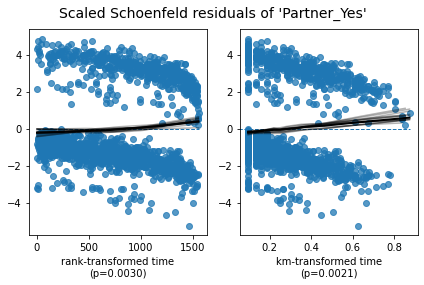

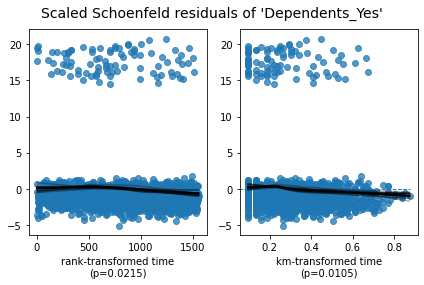

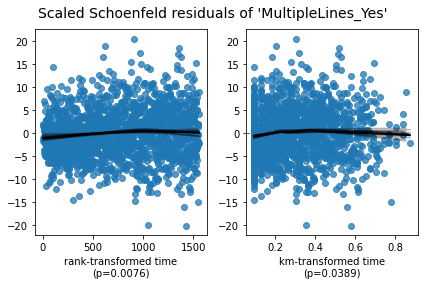

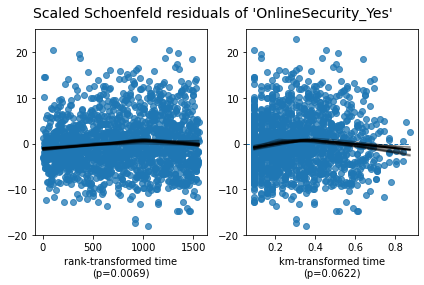

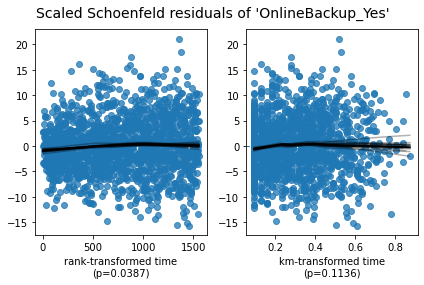

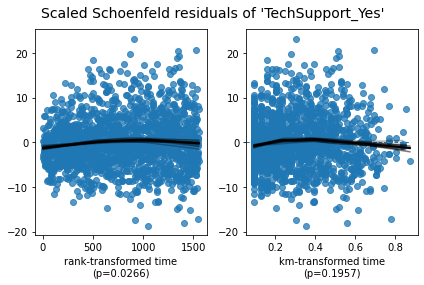

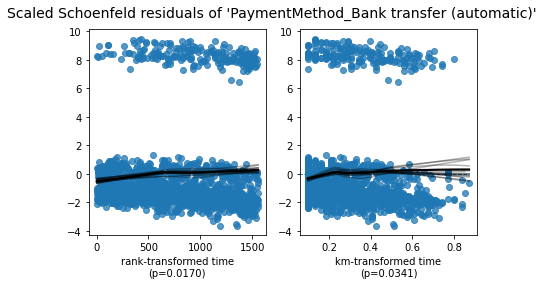

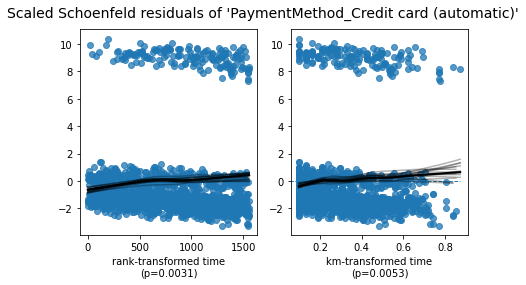

In [128]:
cph.check_assumptions(survival_pd,p_value_threshold=0.05,show_plots=True)

### Log-log Kaplan-Meier Plots

Based on the results of the statistical test and the Schoenfeld residual plots, it's clear that our model violates the proportional hazards assumption many times over.

To get another view of what the issue at play is here, we can use log-log Kaplan-Meier plots. As the name implies, this technique plots Kaplan-Meier curves on a log-log scale.

It's important to note that this transformation of the Kaplan-Meier curves is simply altering the scale in which we view the data. This effectively smushes the data closer together, making it easier to assess.

When the proportional hazard assumpton is not violated, the Kaplan-Meier curves in the log-log plot will appear parallel. This is in line with the plots reviewed above in the section "proportional hazard assumption."

With the exception of internetService, it can be seen in the plots below that the Kaplan-Meier curves are mostly* parallel when log(timeline) is between 1 and 3 but less so when the log(timeline) is less than 1 or greater than 3.

In [133]:
def plot_km_loglog(col):
        plt.figure()
        for r in ndf[col].unique():
            ix = ndf[col] == r
            kmf.fit(T[ix], C[ix],label=r)
            plt.title("km-log-log of {}".format(col))
            kmf.plot_loglogs()
            

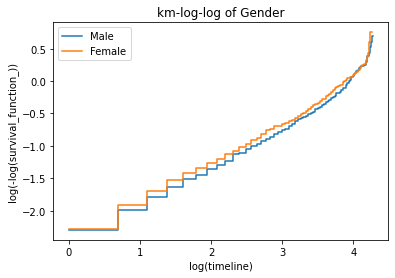

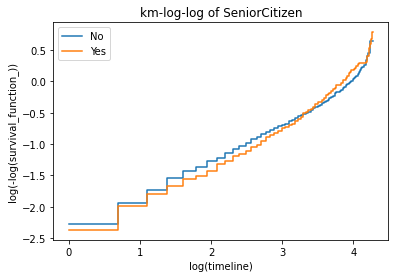

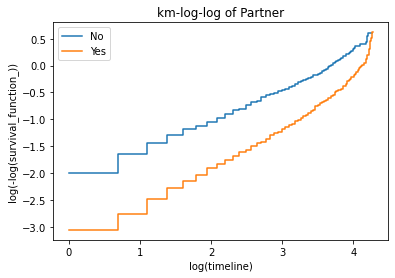

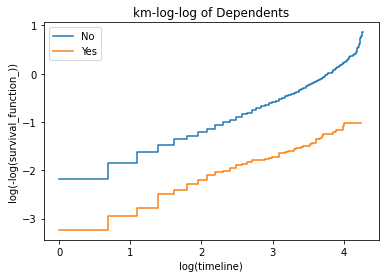

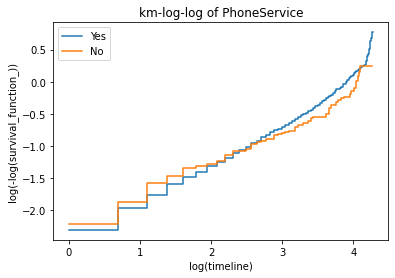

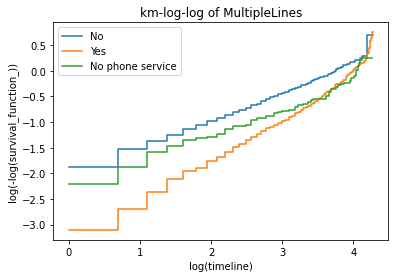

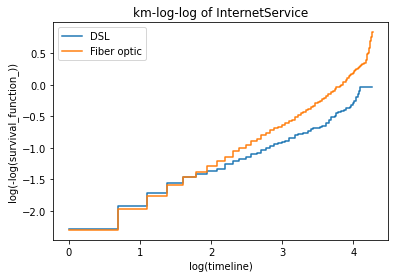

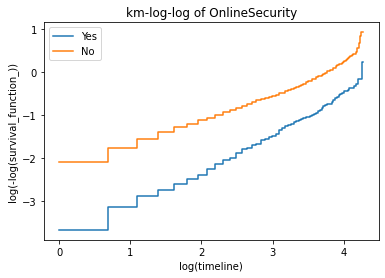

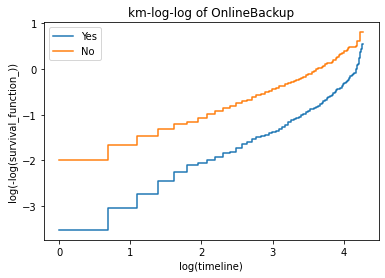

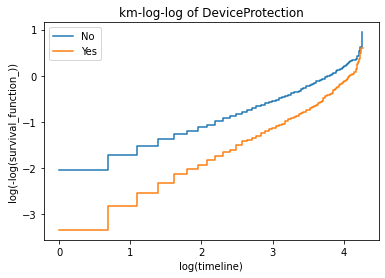

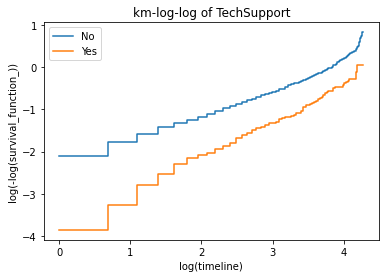

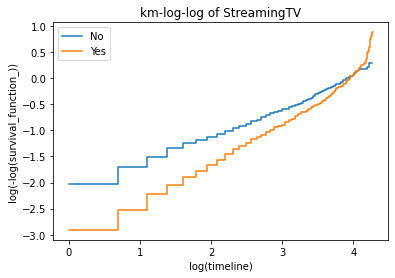

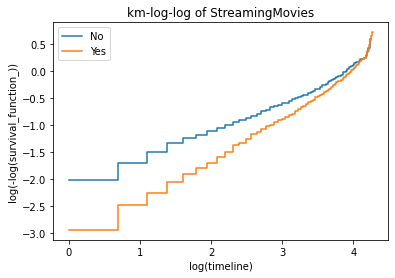

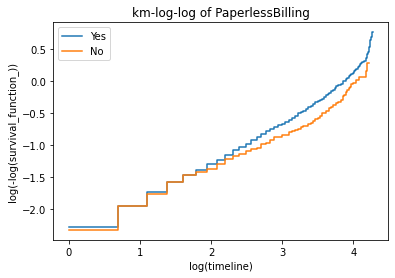

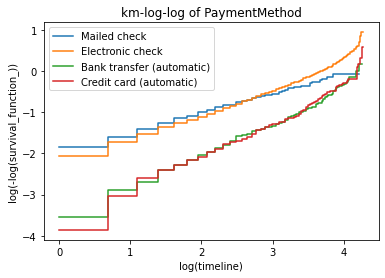

In [134]:
for i in cate_feature:
    plot_km_loglog(i)

### Closing Thoughts

Cox Proportional Hazards is one of the most popular methods for Survival Analysis. This is in part due to CPH being a semi-parametric model, which means that your outcome variable does not need to adhere to a specific distribution. Further, CPH is known to fit various distributions fairly well.

As discussed above, the key assumption that underpins this method is referred to as the proportional hazards assumption. In the event that this assumption is violated, as is the case here, you have a number of options.

Leave the model as-is: it's important to note that this assumption is most important when your objective is inference. If your objective is prediction, you can generally focus on the loss metric as your means for selecting a final model.

Stratify the existing model: if there are a small number of variables causing the issue, you can stratify your model on those variables. The net result of using this approach is that you will have a different baseline hazard for each variable that you stratify the model on. Lifelines makes this easy to incorporate and further details can be found here.

Incoporate time-dependent variables: as noted when reviewing the Cox Proportional Hazards equation, the partial hazard is time-independent. More specifically, the baseline hazard is a function of time and then the partial hazard is a function of the parameters. When a variable is truly time-dependent, it can be modeled as such using an interaction variable. This is referred to as the Extended Cox Proportional Hazards model. Further details can be found here.

Use Cubic Splines or Piecewise Constant Hazards: similar to other regression techniques, you can use cubic splines to add more flexibility to your model. You can think of this as splitting your model into multiple parts. For example, in our model above, it's clear that we see different patterns at certain points in time. What if there were 'knots' at these turning points, enabling your to alter your specification? In the context of Cox Proportional Hazards, using Cubic Splines results in the baseline hazard becoming parametric. Further details on implementing this in Lifelines can be found here. For more information about Cubic splines in the more general case, the book Introduction to Statistical Learning, and the corresponding Youtube videos, are a wonderful resource.

Use a Different Method: although the Cox Proportional Hazards method can be extended in many ways, inclusive of a fully parametric form (e.g. Cubic Splines), it's important to know that other Survival Analysis methods exist. One alternative method is the Accelerated Failure Time model. The Accelerated Failure Time model is fully parametric and can be modeled using various distributions such as Exponential and Weibull. Note that this distribution refers to the shape of the outcome variable.

### Accelerated Failure Time

In this lesson you:
Fit a Log-Logistic Accelerated Failure Time model to IBM's Telco dataset
Interpret the statistical output of the Accelerated Failure Time model
Determine whether the model adheres to or violates the underlying assumptions

### Overview
The canonical example of Accelerated Failure Time models, shared by Kleinbaum & Klein in Survival Analysis: A Self-Learning Text, is the lifespan of dogs. It is commonly accepted that dogs age 7x faster than humans. They go through the same lifestages that we do, just faster.

In contrast to Kaplan-Meier and Cox Proportional Hazards, Accelerated Failure Time is a parametric model. This means that the outcome variable is assumed to follow a specified distribution. Parametric models are typically less 'flexible' than non-parametric and semi-parametric models but can be a good choice when you're comfortable with specifying the distribution of the outcome variable.

Similar to Cox Proportional Hazards, the Accelerated Failure Time model has underlying assumptions to be aware of. These assumptions are covered below.


### The Accelerated Failure Time Model Equation
Using the Accelerated Failure Time equation below, if we were to define group A as humans and group B as dogs, then the acceleration factor would be 7. Similarly, if we define group A as dogs and group B as humans, then the acceleration factor would be 1/7.

The specification for lambda, which represents the accelerated failure rate, is intentionally generalized here. In practice, the survival function for the accelerated failure rate includes one or more parameters. For example, the specification when using log-logistic accelerated failure time is: 1/(1+lambda x t ^ p).

The full specification of the accelerated failure rate is most relevant when using log-log plots to verify whether the accelerated failure time assumptions have been violated. This is covered in further detail below.

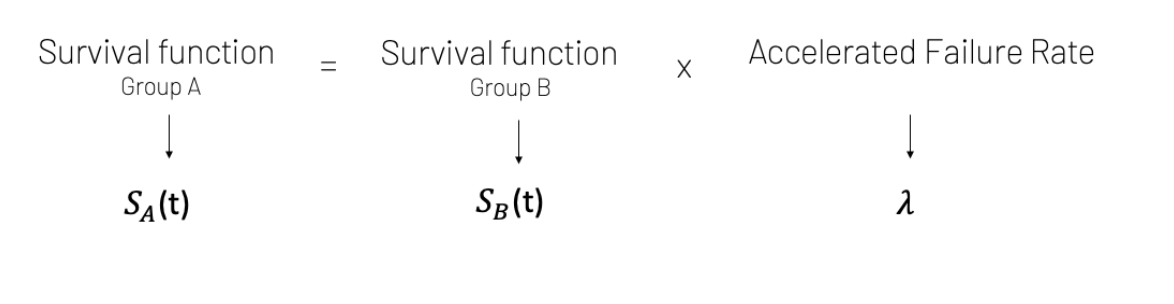

In [135]:
from lifelines import WeibullAFTFitter,LogNormalAFTFitter,LogLogisticAFTFitter

### One-Hot Encode the Categorical Variables
As is the case when using the Lifelines library to fit a Cox Proportional Hazards model, you must one-hot encode your categorical columns when using an Accelerated Failure Time model. We have hand-selected 8 variables to use for this notebook.

After one-hot encoding the variables, we then created a new dataframe consisting of only the columns we need in order to fit the model.

When creating the dataframe that you will use to fit the model, it is important that you drop one column for each one-hot encoded variable. For example, we included dependents_yes and dropped dependents_no. If you neglect to do this, you will likely receive an error when fitting the model that states that there are multi-collinearity issues with your data. This means that certain columns are highly correlated. For example, if you know that dependents_yes = 1 then you in turn know that dependents_no = 0.

You can take one of two approaches when dropping variables. When using Pandas' get_dummies() function, you can simply set drop_first = True. An alternative approach, which is the one taken here, is to hand-select which variables to drop. In this notebook, we dropped the value that had a Kaplan-Meier survival probability curve most similar to the population. While this is by no means necessary, it affords an intuitive interpretation as the baseline closely resembles the population.


### Fit the Accelerated Failure Time Model
Similar to Kaplan-Meier and Cox Proportional Hazards, the first step when using the Lifelines library for Accelerated Failure Time is to fit the model.

In this notebook, the type of distribution that we have specified for the outcome variable is log-logistic. This is reflected by the use of LogLogisticAFTFitter when fitting the model. Other options that are available through Lifelines include: WeibullAFTFitter, LogNormalAFTFitter. After we fit the model and assess the results, we will assess whether LogLogistic is the appropriate type of distribution to specify for this dataset.

We provided three parameters to the fitted model:

suvival_pd: the dataframe used to fit the model

Tenure: the duration that a customer has been with the company (if still a subscriber) or was with the company prior to churning.

Churn: a Boolean indicating whether the customer is still a subscriber or not

In [136]:
aft = LogLogisticAFTFitter()
aft.fit(survival_pd, duration_col='TenureMonths', event_col='ChurnValue')

<lifelines.LogLogisticAFTFitter: fitted with 3351 total observations, 1795 right-censored observations>

In [137]:
# Note: the output is exponentiated because it is initially in log-odds
print("Median Survival Time:{:.2f}".format(np.exp(aft.median_survival_time_)))

Median Survival Time:33.08


### Assess the Results of the Fitted Model

There are three key questions to ask when initially assessing the model:

Is each covariate statistically significant?

In the column labeled p below, it can be seen that the p-value for each column is below < 0.005. Therefore, each of the columns is statistically significant and safe to include.
Similar to other forms of regression, in the event that a variable is not statisitically significant, you can drop that column from your analysis or recategorize the corresponding values.
How confident are we in the coefficient estimates?

Upper and lower bounds for each coefficient and exp(coefficient) are provided in the model summary below (e.g. exp(coef) lower 95%, exp(coef) upper 95%).
Shown below the model summary, these bounds can also be viewed visually. Although it's not seen here, note that when viewing the bounds in this way, a variable can be deemed as not signficant when it's corresponding box-and-whisker plot crosses the value 1.
What is the effect of each covariate on the hazard ratio?

Using internetService_DSL as an example, it's shown below that coef = 0.38 and exp(coef) = 1.47. Referring back to the Accelerated Failure Time equation, this means that a customer's time-until-churn is accelerated by a factor of 1.47 when they have Fiber Optic as their internet service. Note that Fiber Optic is the baseline value and corresponds to Group A in the equation shared above.
Note that this output also includes several metrics that can be used when comparing models:

Concordance

AIC

Log-likelihood Ratio

In [138]:
aft.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 3351 total observations, 1795 right-censored observations>
             duration col = 'TenureMonths'
                event col = 'ChurnValue'
   number of observations = 3351
number of events observed = 1556
           log-likelihood = -6781.32
         time fit was run = 2021-05-12 17:27:41 UTC

---
                                                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                                       
alpha_ Dependents_Yes                            0.96       2.61       0.12             0.73             1.19                 2.07                 3.29
       DeviceProtection_Yes                      0.56       1.75       0.17             0.23             0.89                 1.26                 2.42
       Gender_Male                               0.15       1.16       0.06             0.03             0.27                 1.03                 1.31
       InternetService_DSL                      -0.41       0.66       0.77            -1.92             1.09                 0.15                 2.98
       MonthlyCharges                           -0.03       0.97       0.03            -0.09             0.03                 0.91                 1.03
       MultipleLines_Yes                         0.78       2.18       0.17             0.45             1.11                 1.57                 3.03
       OnlineBackup_Yes                          0.93       2.55       0.17             0.60             1.26                 1.83                 3.54
       OnlineSecurity_Yes                        0.98       2.65       0.17             0.64             1.32                 1.89                 3.73
       PaperlessBilling_No                       0.15       1.17       0.07             0.01             0.30                 1.01                 1.35
       Partner_Yes                               0.49       1.63       0.07             0.36             0.62                 1.43                 1.87
       PaymentMethod_Bank transfer (automatic)   0.74       2.10       0.09             0.56             0.93                 1.75                 2.52
       PaymentMethod_Credit card (automatic)     0.80       2.22       0.10             0.61             0.98                 1.83                 2.68
       PaymentMethod_Mailed check               -0.07       0.93       0.10            -0.26             0.12                 0.77                 1.13
       PhoneService_Yes                          0.54       1.71       0.63            -0.69             1.77                 0.50                 5.85
       SeniorCitizen_Yes                         0.13       1.14       0.07            -0.01             0.27                 0.99                 1.31
       StreamingMovies_Yes                       0.58       1.78       0.31            -0.04             1.19                 0.96                 3.29
       StreamingTV_Yes                           0.49       1.63       0.31            -0.13             1.10                 0.88                 3.02
       TechSupport_Yes                           0.80       2.22       0.18             0.45             1.14                 1.58                 3.13
       Intercept                                 2.87      17.64       1.53            -0.13             5.87                 0.88               353.72
beta_  Intercept                                 0.14       1.15       0.02             0.10             0.18                 1.10                 1.20

                                                   z      p   -log2(p)
param  covariate                                                      
alpha_ Dependents_Yes                           8.17 <0.005      51.57
       DeviceProtection_Yes                     3.37 <0.005      10.40
       Gender_Male     

<AxesSubplot:xlabel='log(accelerated failure rate) (95% CI)'>

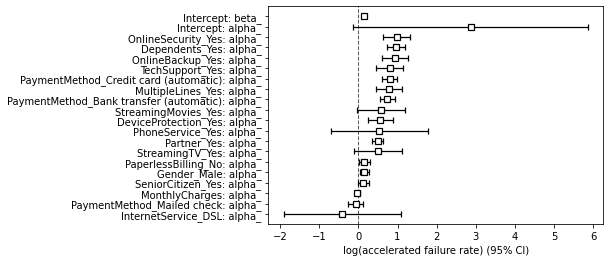

In [139]:
aft.plot()

### Verify if the Model Adheres to Assumptions
As we saw with Cox Proportional Hazards, log-log plots are very helpful for assessing whether a model violates assumptions.

For Cox Proportional Hazards, log-log plots were created with log(time) on the x-axis and the log-log of the survival function on the y-axis.

For Accelerated Failure Time, the formula that is used for the y-axis is dependent upon the type of distribution specified for the outcome variable. Since we are using log-logistic here, the formula for the y-axis is: log(1 - survival_function) / survival_function.

There are two underlying assumptions to assess when using an Accelerated Failure Time model:

Does the model adhere to the Proportional Odds assumption? - the answer is yes when lines in the plot are parallel.

Is the specified distribution appropriate for this model? - the answer is yes when the lines are straight.

How does our model fare?

For the most part, the lines in each of the plots are relatively straight. There is some deviation but not bad overall. This implies that selecting log-logistic as the specified distribution is a reasonable choice.

For the most part, the lines in each of the plots are not parallel. This implies that Accelerated Failure Time is not appropriate for the specified model.

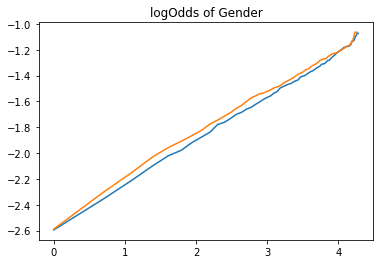

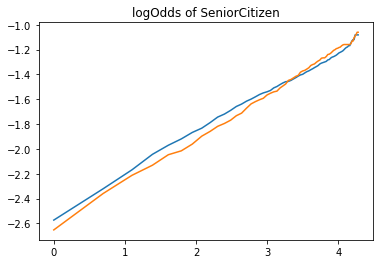

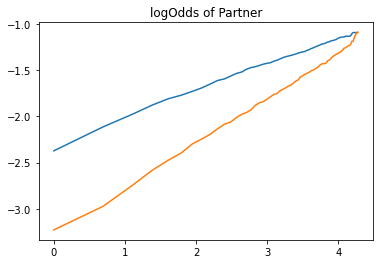

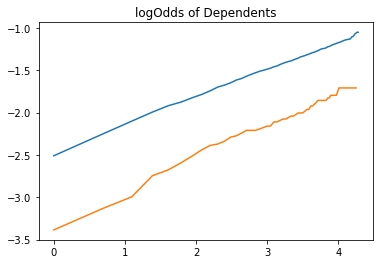

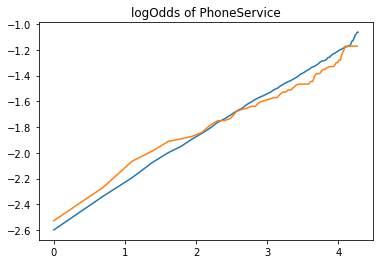

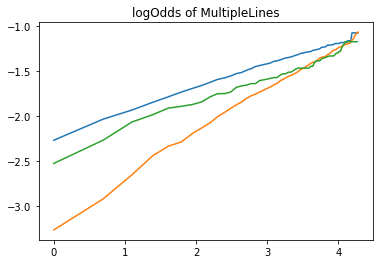

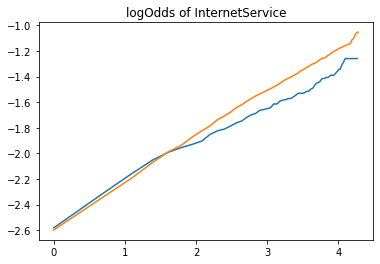

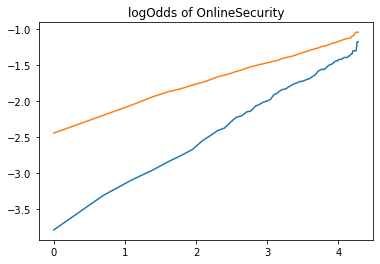

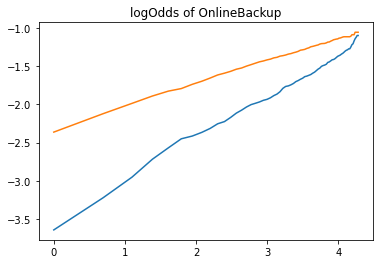

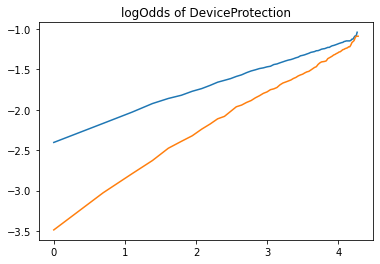

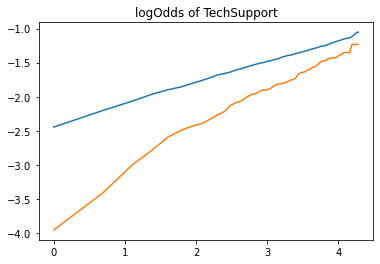

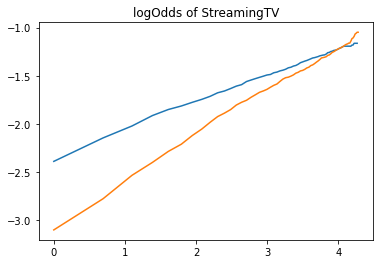

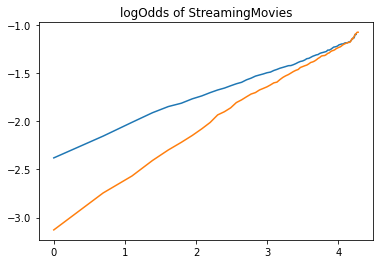

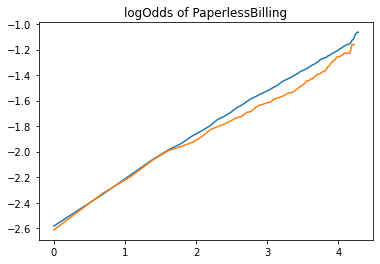

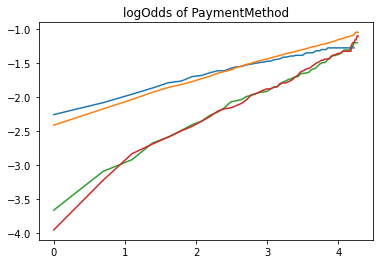

In [140]:
def plot_km_logOdds(col):
    plt.figure()
    for r in ndf[col].unique():
        ix = ndf[col] == r
        kmf.fit(T[ix], C[ix],label=r)
        sf = kmf.survival_function_
        sf['failureOdds'] = (np.log(1-sf))/sf
        sf['logTime'] = np.log(sf.index)
        plt.plot(sf['logTime'],sf['failureOdds'])
        plt.title('logOdds of {}'.format(col))

for i in cate_feature:
    plot_km_logOdds(i)

### Closing Thoughts
Cox Proportional Hazards is by far the most popular method used for Time-to-Event (or Survival) Analysis. A big part of why this is the case is that as a semi-parametric model, you are not required to specify the form of your outcome variable. Compounding this benefit, this model tends to perform quite well, and as discussed in the previous notebook, there are a number of techniques available for further improvement.

While Cox Proportional Hazards is often a good choice, it's beneficial to know that other options do exist. In this notebook, we reviewed a fully parametric model referred to as Accelerated Failure Time.

In practice, if your goal is inference, you should select the model that best adheres to the underlying assumptions. If you goal is prediction, you should select the model that performs best with respect to your chosen evaluation metric. For this specific dataset, it would be advised to further explore options 2, 3, and 4 shared in the closing thoughts section of the Cox Proportional Hazards notebook.

### Customer Lifetime Value
In this lesson you:
Fit a Cox Proportional Hazard model to IBM's Telco dataset.
Interpret the statistical output of the Cox Proportional Hazard Model.
Determine whether the model adheres to or violates the proportional hazard assumption.

In [141]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
 
from lifelines import WeibullAFTFitter,LogNormalAFTFitter,LogLogisticAFTFitter
from lifelines.fitters.coxph_fitter import CoxPHFitter
from lifelines.statistics import proportional_hazard_test

In [282]:
def get_value_df():
    data = survival_pd.drop(['ChurnValue','TenureMonths'],axis=1)
    irr = 0.01
    prob = cph.predict_survival_function(data)
    expected_Profit = prob.T.apply(lambda x: x*survival_pd['MonthlyCharges']*0.3, axis=0)
    NPV_of_Expected_Monthly_Profit= expected_Profit.apply(lambda x: x / ((1+irr)**prob.index),axis=1)
    cum_NPV = NPV_of_Expected_Monthly_Profit.cumsum(axis=1)
#     cum_NPV.reset_index(inplace=True)
#     cum_NPV = cum_NPV.rename(columns = {'index':'CustomerID'})
#     prob.columns = np.arange(0,3351)
#     prob.columns = prob.columns.astype('str').str.replace(r'(?=^\d+)','c_',regex=True)
#     prob.reset_index(inplace=True)
#     prob = prob.rename(columns = {'index':'Month'})
    
    return cum_NPV,prob

In [283]:
cum_NPV,survival_prob = get_value_df()

In [26]:
cum_NPV = pd.read_csv('cum_NPV.csv')
cum_NPV

,CustomerID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0,15.168787,29.814954,44.012757,57.779955,71.182674,84.295812,97.085738,109.581112,121.761529,...,471.968802,474.270215,476.338877,478.090757,479.757214,481.146894,482.157503,483.005348,483.662302,484.312751
1,1,18.221822,35.090991,50.874667,65.654274,79.641365,93.056276,105.815668,118.005515,129.581975,...,338.846769,339.182252,339.438715,339.605877,339.754572,339.847576,339.887908,339.913543,339.926716,339.939759
2,2,28.218872,55.533819,82.068458,107.851878,132.994991,157.624052,181.682032,205.217268,228.194950,...,911.108424,915.962489,920.367910,924.157309,927.776355,930.846439,933.148851,935.112624,936.671914,938.215765
3,3,30.542799,60.512367,89.961317,118.901729,147.382836,175.462062,203.114212,230.361959,257.189777,...,1224.977449,1235.371869,1245.313048,1254.619925,1263.703419,1272.160504,1279.657534,1286.652621,1292.996161,1299.276894
4,4,30.437971,60.405435,89.935930,119.037737,147.742594,176.087587,204.057700,231.668148,258.909937,...,1293.799347,1306.063322,1317.945602,1329.305322,1340.452084,1351.071880,1360.883892,1370.244652,1379.017247,1387.702984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,7030,20.980957,41.386659,61.288963,80.704328,99.698163,118.345624,136.612547,154.527796,172.070313,...,728.474821,733.055600,737.289815,741.041353,744.651515,747.815280,750.330749,752.544628,754.386049,756.209238
3347,7032,11.336458,21.784829,31.524350,40.610700,49.184158,57.389601,65.173380,72.592158,79.618222,...,201.561540,201.728560,201.854073,201.933651,202.003937,202.046582,202.064092,202.074901,202.080219,202.085484
3348,7035,17.734343,34.074689,49.302765,63.506187,76.905285,89.727480,101.888669,113.477816,124.451530,...,314.416783,314.674318,314.867639,314.989988,315.098001,315.163409,315.190171,315.206658,315.214748,315.222757
3349,7036,20.172048,38.797937,56.186993,72.434566,87.783919,102.487157,116.450100,129.771256,142.401605,...,365.285001,365.610788,365.857347,366.015462,366.155524,366.241576,366.277715,366.300292,366.311601,366.322799


In [24]:
# cum_NPV = cum_NPV.set_index('CustomerID').T
# cum_NPV = cum_NPV.reset_index()
# cum_NPV.set_index('index',inplace=True)
# cum_NPV.drop(['CustomerID'], axis=1, inplace= True)
# cum_NPV.columns = cum_NPV.columns.astype('str').str.replace(r'(?=^\d+)','cus',regex=True)
cum_NPV.index.rename('Month',inplace=True)



In [280]:
survival_prob.to_csv('survival_probability.csv', index=False)
cum_NPV.to_csv('cum_NPV.csv',index=False)

In [43]:
cum_NPV

,CustomerID,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0,15.168787,29.814954,44.012757,57.779955,71.182674,84.295812,97.085738,109.581112,121.761529,...,471.968802,474.270215,476.338877,478.090757,479.757214,481.146894,482.157503,483.005348,483.662302,484.312751
1,1,18.221822,35.090991,50.874667,65.654274,79.641365,93.056276,105.815668,118.005515,129.581975,...,338.846769,339.182252,339.438715,339.605877,339.754572,339.847576,339.887908,339.913543,339.926716,339.939759
2,2,28.218872,55.533819,82.068458,107.851878,132.994991,157.624052,181.682032,205.217268,228.194950,...,911.108424,915.962489,920.367910,924.157309,927.776355,930.846439,933.148851,935.112624,936.671914,938.215765
3,3,30.542799,60.512367,89.961317,118.901729,147.382836,175.462062,203.114212,230.361959,257.189777,...,1224.977449,1235.371869,1245.313048,1254.619925,1263.703419,1272.160504,1279.657534,1286.652621,1292.996161,1299.276894
4,4,30.437971,60.405435,89.935930,119.037737,147.742594,176.087587,204.057700,231.668148,258.909937,...,1293.799347,1306.063322,1317.945602,1329.305322,1340.452084,1351.071880,1360.883892,1370.244652,1379.017247,1387.702984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3346,7030,20.980957,41.386659,61.288963,80.704328,99.698163,118.345624,136.612547,154.527796,172.070313,...,728.474821,733.055600,737.289815,741.041353,744.651515,747.815280,750.330749,752.544628,754.386049,756.209238
3347,7032,11.336458,21.784829,31.524350,40.610700,49.184158,57.389601,65.173380,72.592158,79.618222,...,201.561540,201.728560,201.854073,201.933651,202.003937,202.046582,202.064092,202.074901,202.080219,202.085484
3348,7035,17.734343,34.074689,49.302765,63.506187,76.905285,89.727480,101.888669,113.477816,124.451530,...,314.416783,314.674318,314.867639,314.989988,315.098001,315.163409,315.190171,315.206658,315.214748,315.222757
3349,7036,20.172048,38.797937,56.186993,72.434566,87.783919,102.487157,116.450100,129.771256,142.401605,...,365.285001,365.610788,365.857347,366.015462,366.155524,366.241576,366.277715,366.300292,366.311601,366.322799


In [41]:
# survival_prob = pd.read_csv('survival_probability.csv')
# survival_prob = survival_prob.T.drop(['Month'],axis =0)
survival_prob = survival_prob.set_index(cum_NPV['CustomerID'])
survival_prob.columns = survival_prob.columns + 1
survival_data = pd.concat([cum_NPV.iloc[:,[11,35,47,71]],survival_prob],axis=1)
survival_data.columns = survival_data.columns.astype('str').str.replace('(?=^\d+)','M',regex=True)
survival_data.columns=survival_data.columns.str.replace('(?=^M\d{2}.0{1})','CLV',regex=True)
survival_data.columns = survival_data.columns.str.replace('.0','',regex=True)
survival_data.to_csv('survival_data.csv', index=True)